# Exploratory Data Analysis (EDA) of Water Pumps Dataset

This notebook is dedicated to performing Exploratory Data Analysis (EDA) on the Water Pumps dataset. The primary objectives of this EDA are:

1. **Understand the Dataset**: Gain insights into the structure, features, and types of data present.
2. **Data Cleaning**: Identify and handle missing, inconsistent, or erroneous data.
3. **Descriptive Statistics**: Summarize the main characteristics of the dataset using statistical measures.
4. **Data Visualization**: Create visual representations to uncover patterns, trends, and relationships within the data.
5. **Feature Engineering**: Generate new features or modify existing ones to improve the performance of machine learning models.

By the end of this notebook, we aim to have a comprehensive understanding of the dataset, which will guide further analysis and model building.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

# show all columns
pd.set_option("display.max_columns", None)

In [2]:
# read the data
df = pd.read_csv("../data/raw/pump_sensor.csv", index_col=0)

df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

In [4]:
# timestap is an object, convert it to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   sensor_00       210112 non-null  float64       
 2   sensor_01       219951 non-null  float64       
 3   sensor_02       220301 non-null  float64       
 4   sensor_03       220301 non-null  float64       
 5   sensor_04       220301 non-null  float64       
 6   sensor_05       220301 non-null  float64       
 7   sensor_06       215522 non-null  float64       
 8   sensor_07       214869 non-null  float64       
 9   sensor_08       215213 non-null  float64       
 10  sensor_09       215725 non-null  float64       
 11  sensor_10       220301 non-null  float64       
 12  sensor_11       220301 non-null  float64       
 13  sensor_12       220301 non-null  float64       
 14  sensor_13       220301 non-null  float64 

In [5]:
df.isna().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [6]:
# count how many values we have per year and month
df["timestamp"].dt.to_period("M").value_counts()

timestamp
2018-05    44640
2018-07    44640
2018-08    44640
2018-04    43200
2018-06    43200
Freq: M, Name: count, dtype: int64

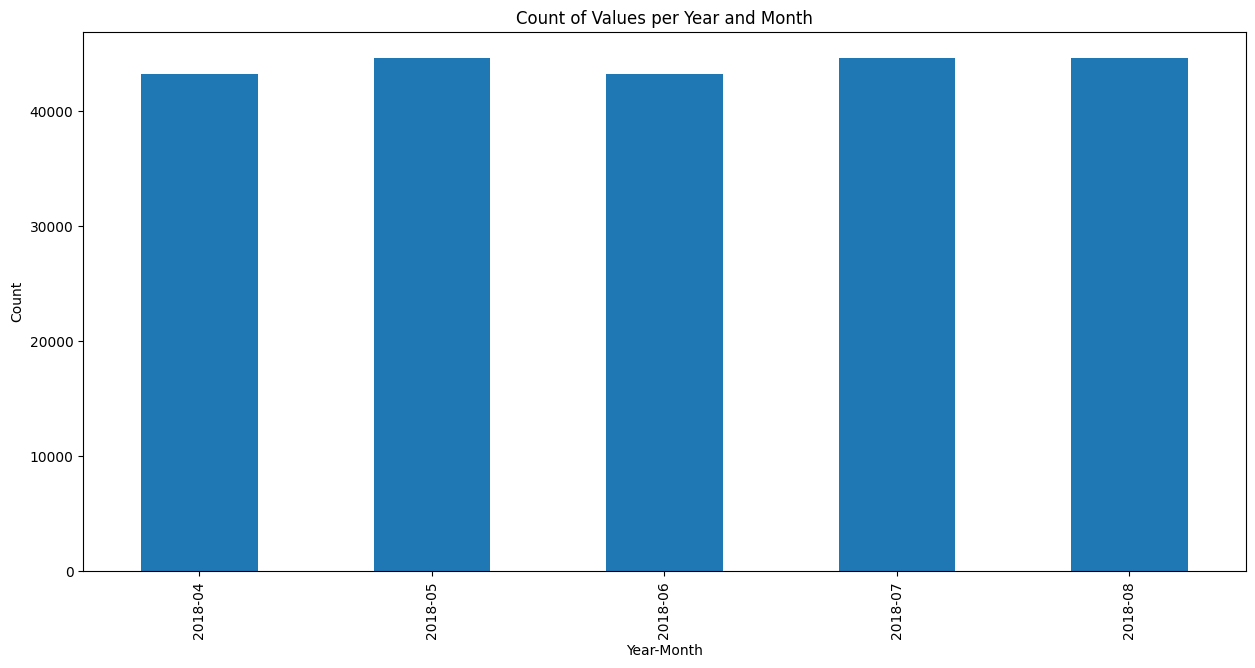

In [7]:
# count how many values we have per year and month
counts_per_month = df["timestamp"].dt.to_period("M").value_counts().sort_index()

# plot the results
counts_per_month.plot(kind="bar", figsize=(15, 7))
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("Count of Values per Year and Month")
plt.show()

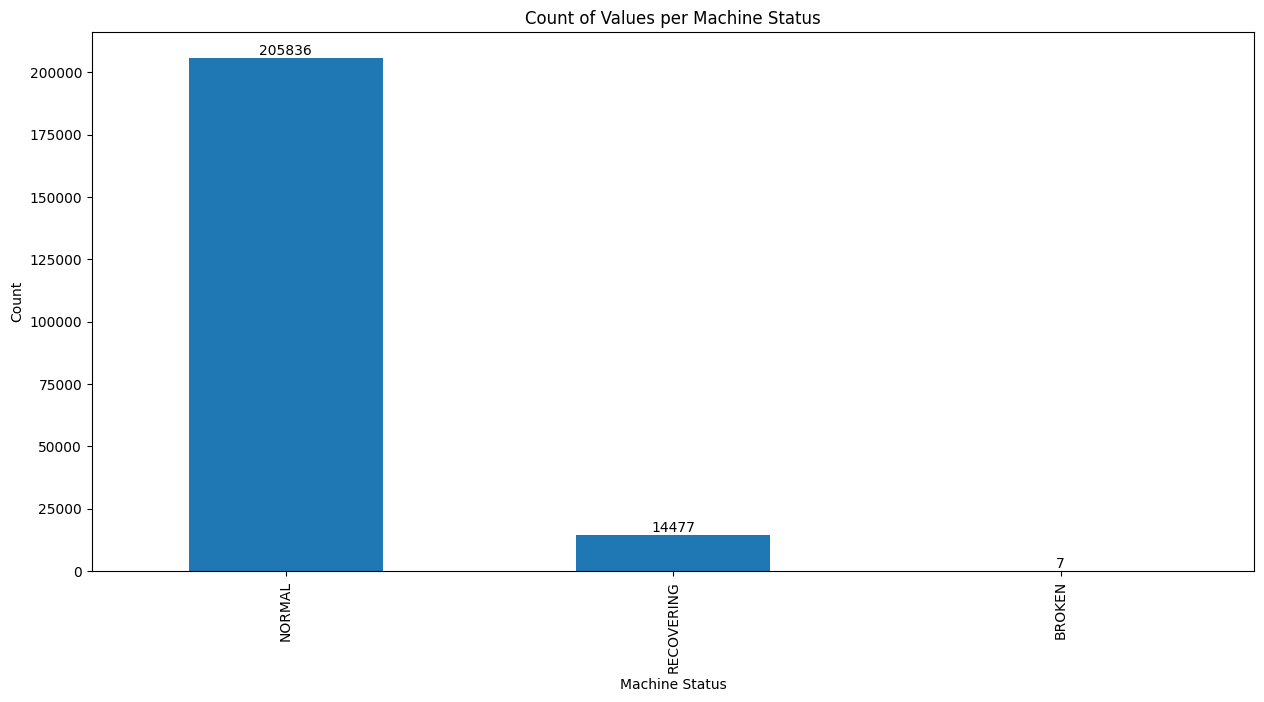

In [8]:
# make a plot about the target column "machine_status"
counts = df["machine_status"].value_counts()
counts.plot(kind="bar", figsize=(15, 7))
plt.xlabel("Machine Status")
plt.ylabel("Count")
plt.title("Count of Values per Machine Status")

# show the count at the top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha="center", va="bottom")

plt.show()

Based on the initial exploratory data analysis (EDA) performed in the notebook, here are some preliminary conclusions:

1. **Missing Values**:
    - There are missing values in several sensor columns. We will make the assumption that these null values refer to no reading value, so we will replace null-values with a value of zero.

2. **Temporal Distribution**:
    - The data spans from April 2018 to August 2018.
    - The count of values per month is relatively consistent, with slight variations.

3. **Machine Status Distribution**:
    - The majority of the machine statuses are `NORMAL` (205,836), followed by `RECOVERING` (14,477), and a very small number of `BROKEN` (7).
    - This indicates that the dataset is highly imbalanced with respect to the target variable `machine_status`.

These initial findings provide a foundation for further analysis, such as handling missing values, addressing class imbalance, and exploring relationships between sensor readings and machine status.

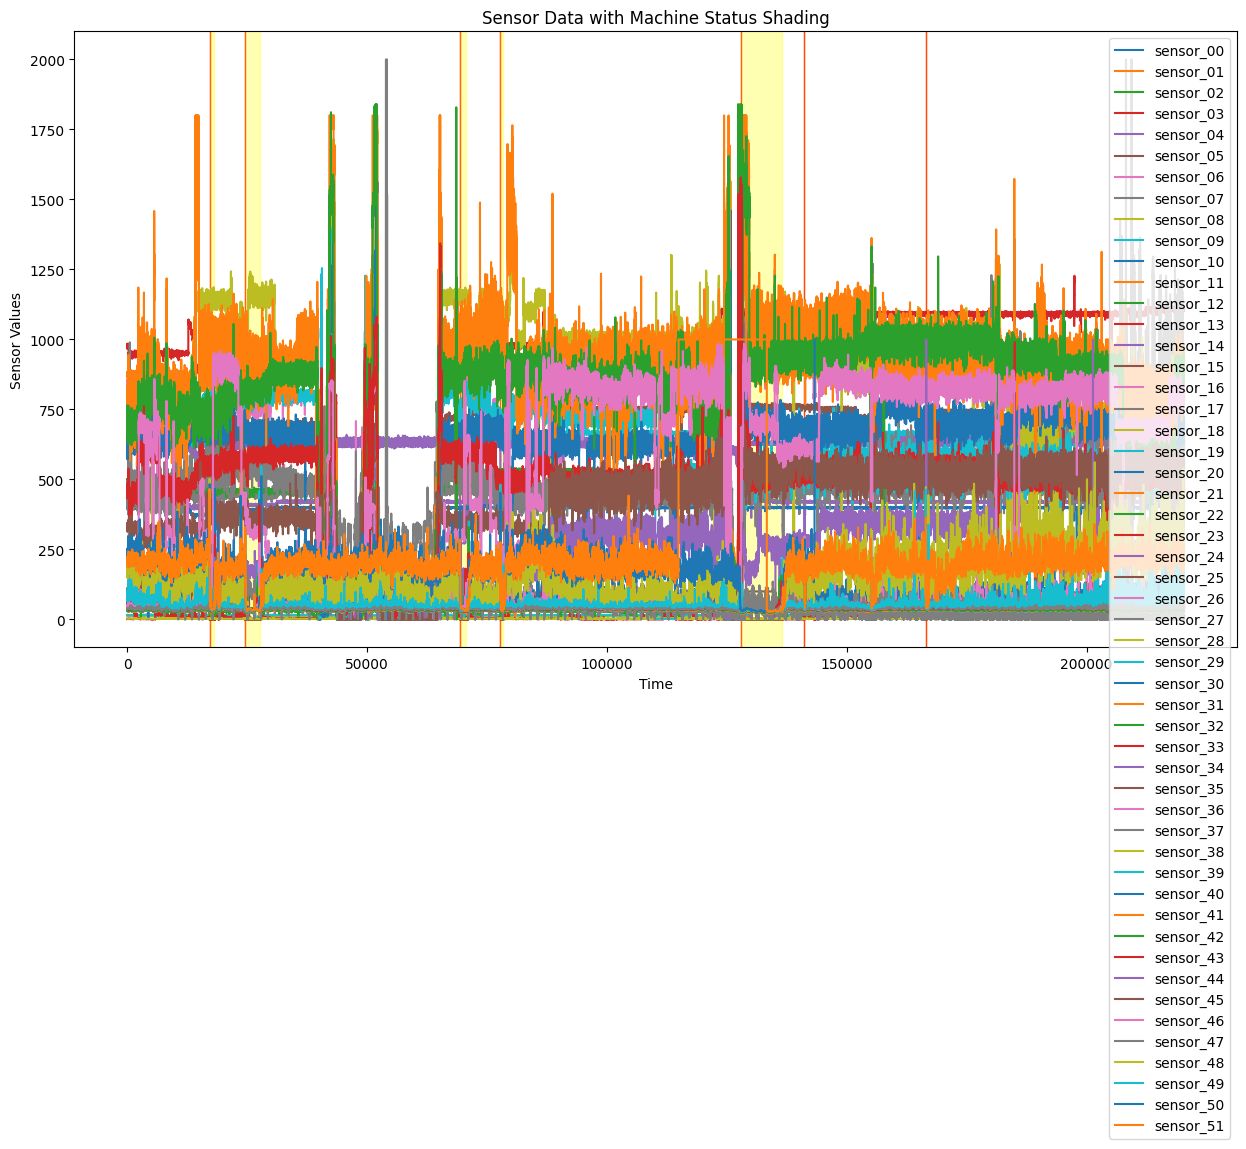

In [9]:
# Identify sensor columns
sensor_columns = [col for col in df.columns if col.startswith("sensor_")]

# Set up the plot
plt.figure(figsize=(15, 8))

# Plot sensor data
for sensor in sensor_columns:
    sns.lineplot(data=df, x=df.index, y=sensor, label=sensor)

# Define machine statuses
broken = df["machine_status"] == "BROKEN"
recovering = df["machine_status"] == "RECOVERING"


# Function to get status periods
def get_status_periods(status_series):
    periods = []
    start = None
    for idx, val in status_series.items():
        if val and start is None:
            start = idx
        elif not val and start is not None:
            periods.append((start, idx))
            start = None
    if start is not None:
        periods.append((start, status_series.index[-1]))
    return periods


# Get periods for each status
broken_periods = get_status_periods(broken)
recovering_periods = get_status_periods(recovering)

# Add shaded regions
for start, end in broken_periods:
    plt.axvspan(start, end, color="red", alpha=1)

for start, end in recovering_periods:
    plt.axvspan(start, end, color="yellow", alpha=0.3)

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Sensor Data with Machine Status Shading")
plt.legend(loc="upper right")
plt.show()

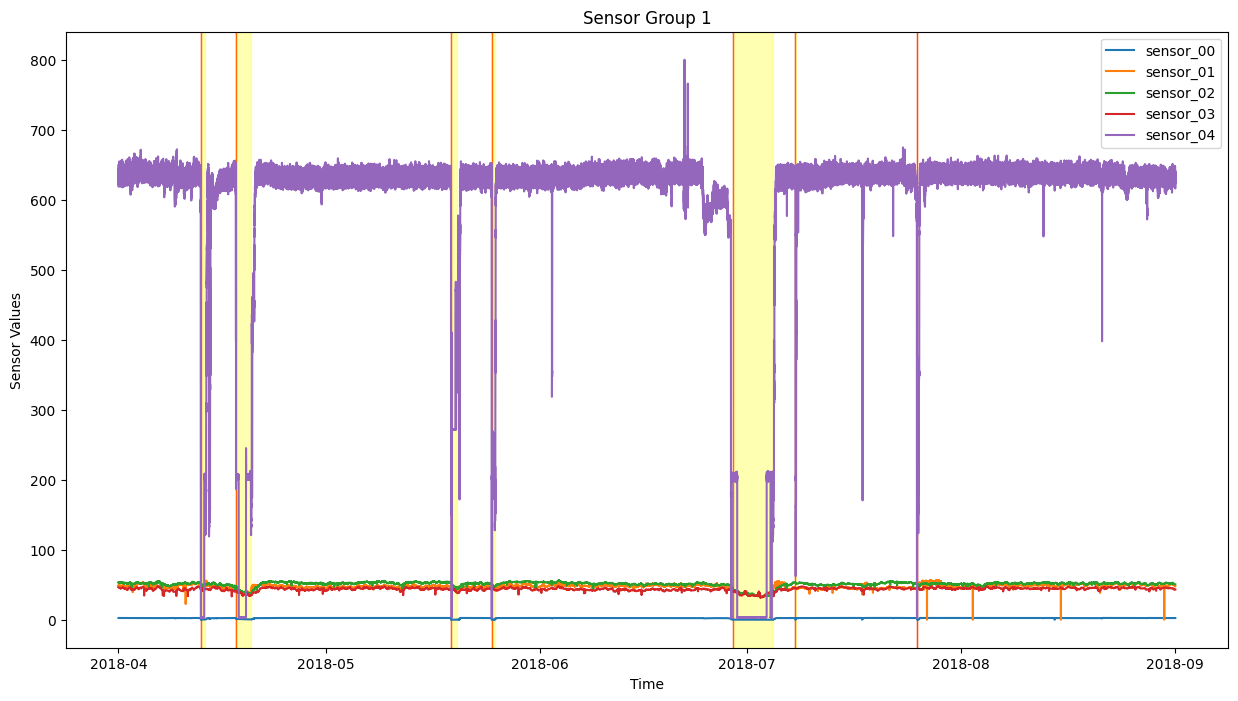

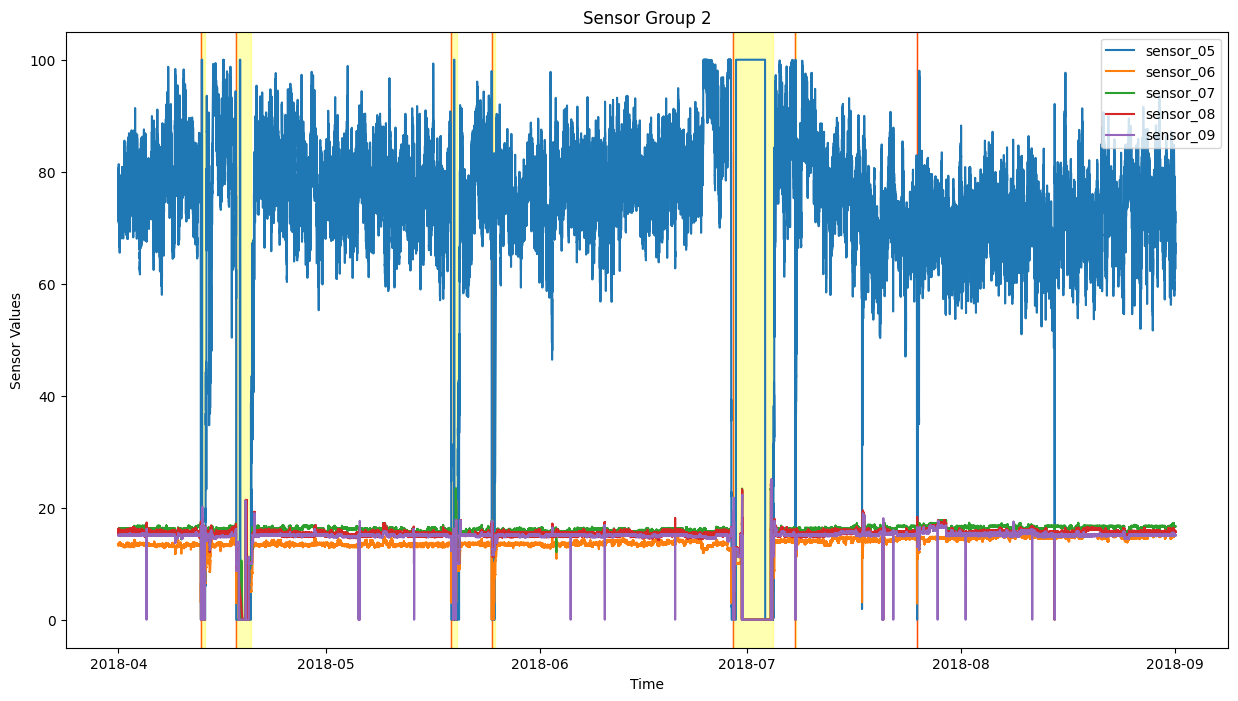

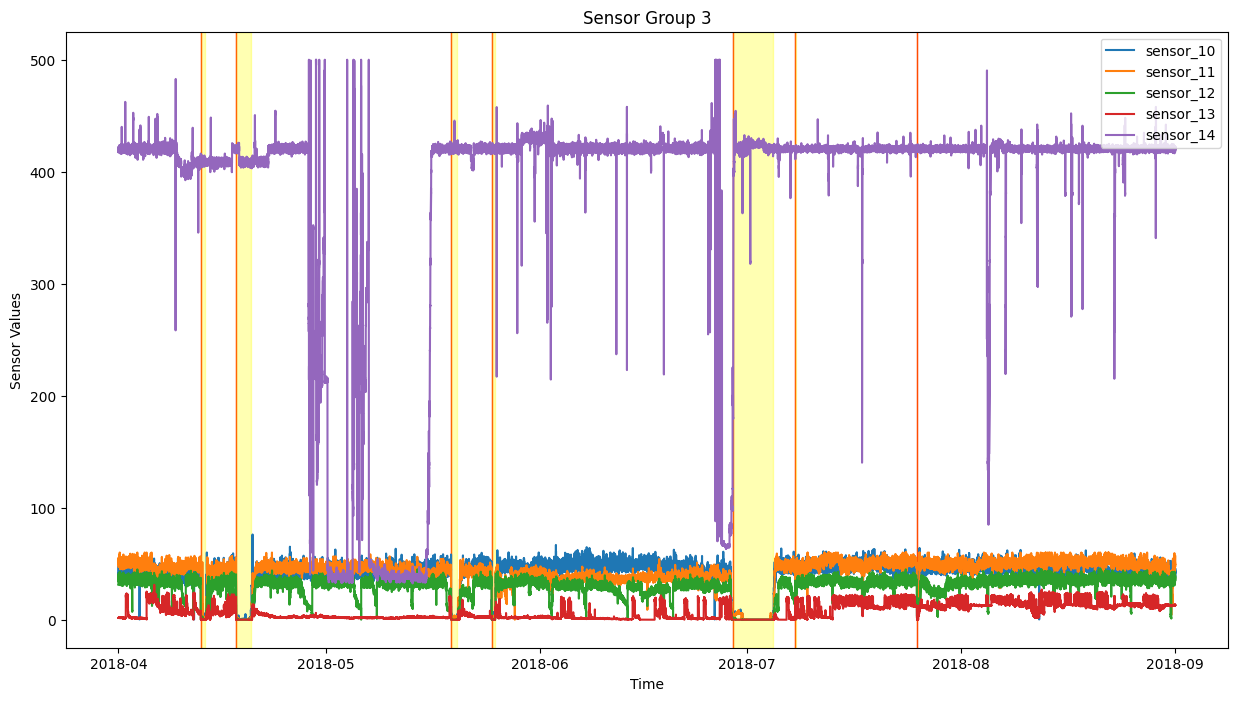

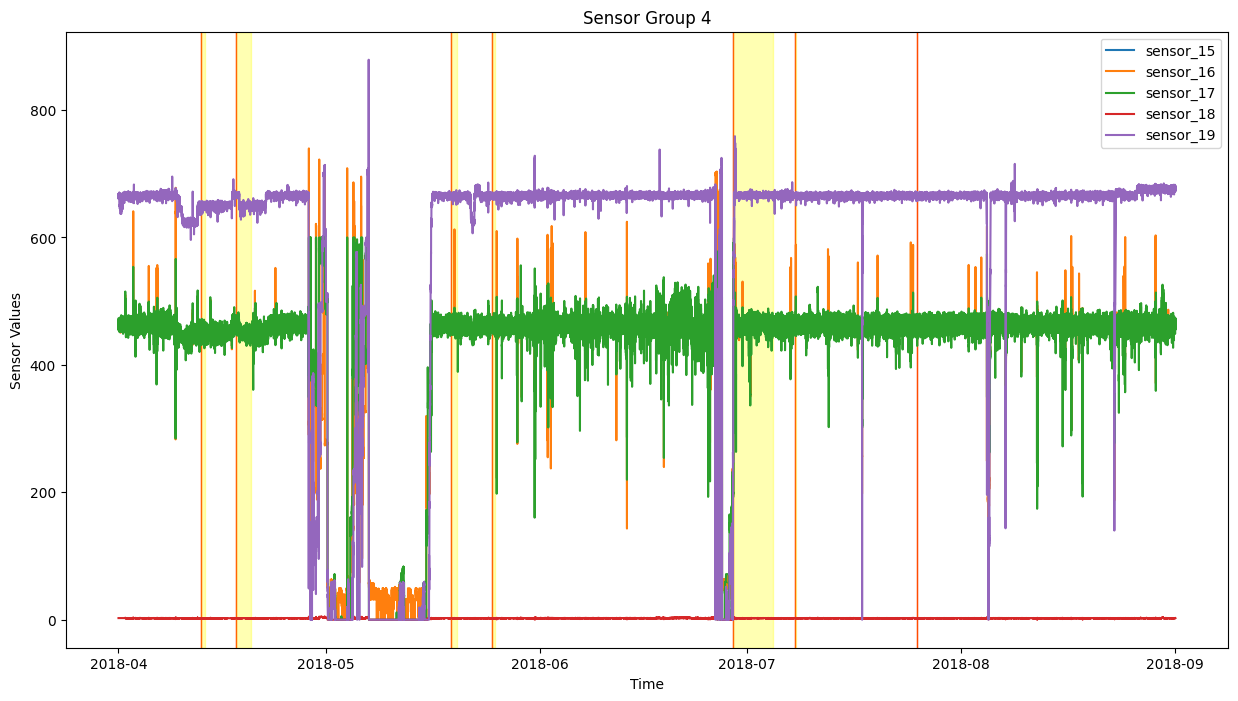

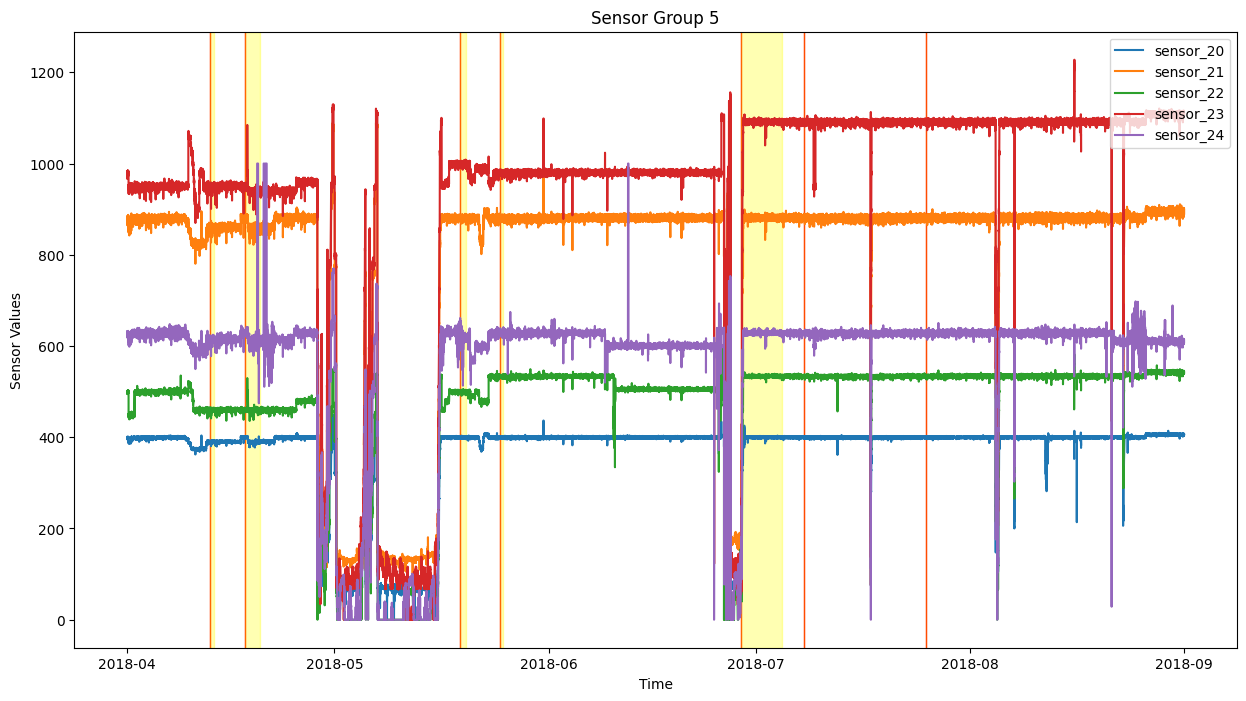

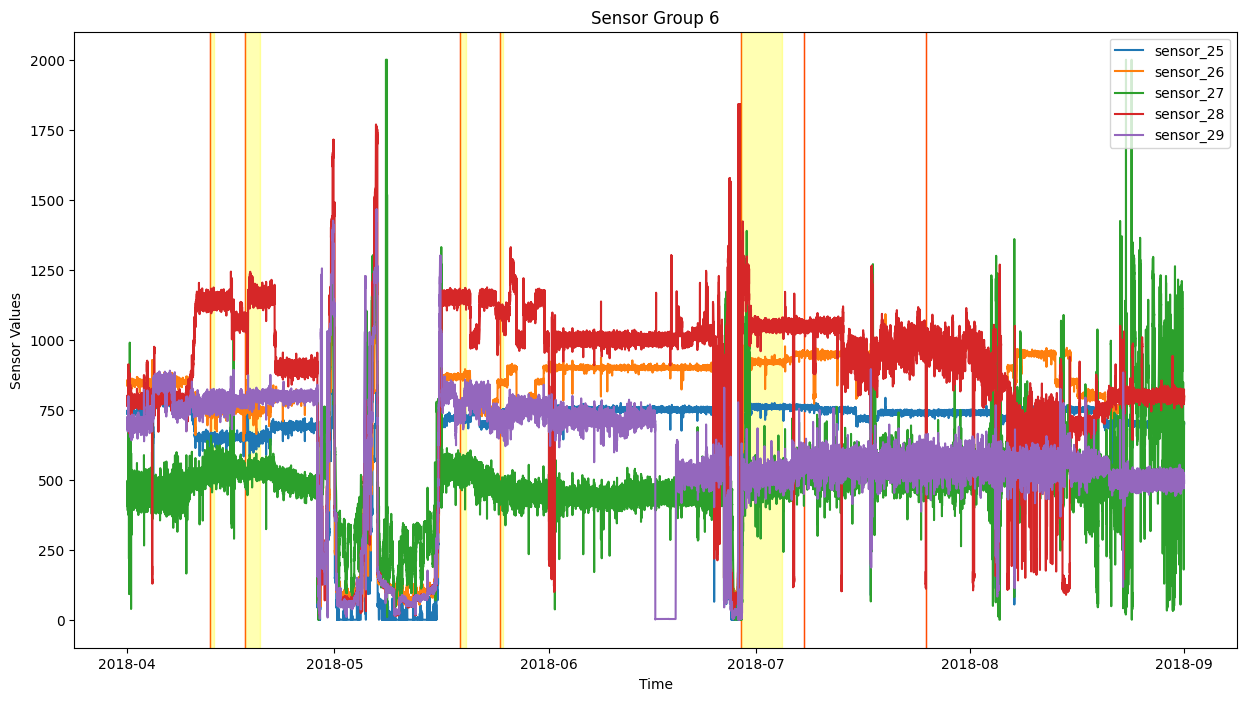

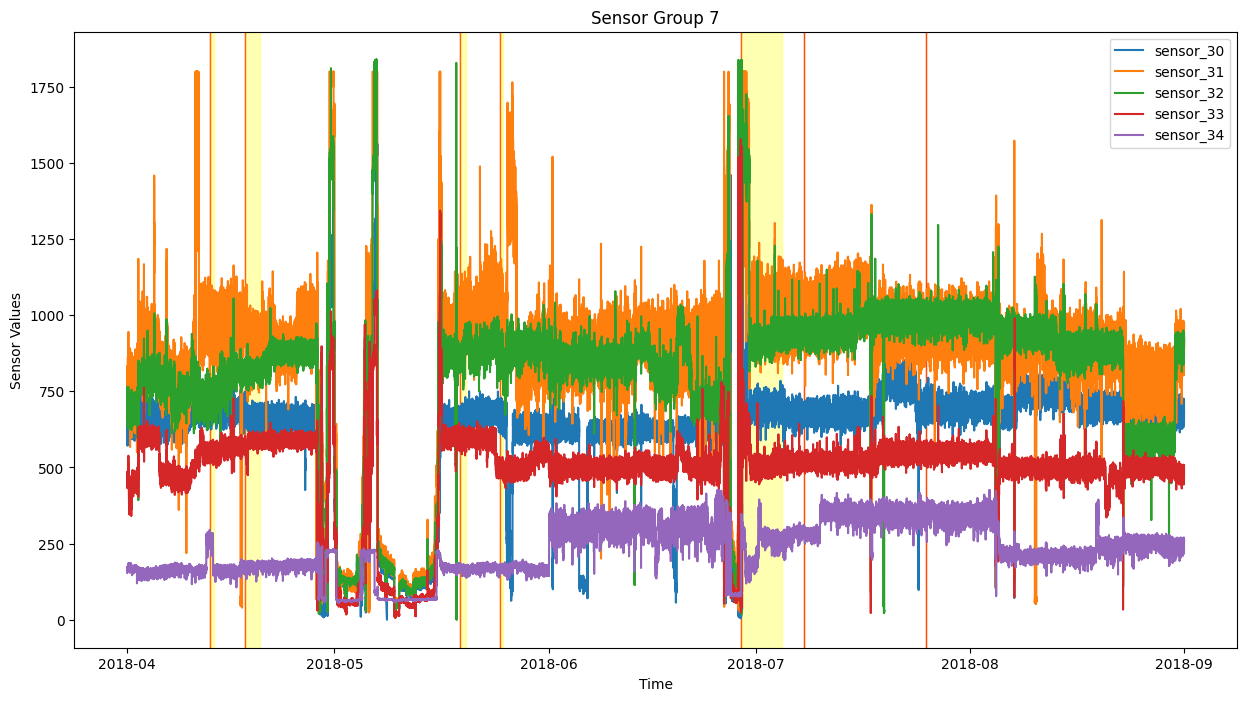

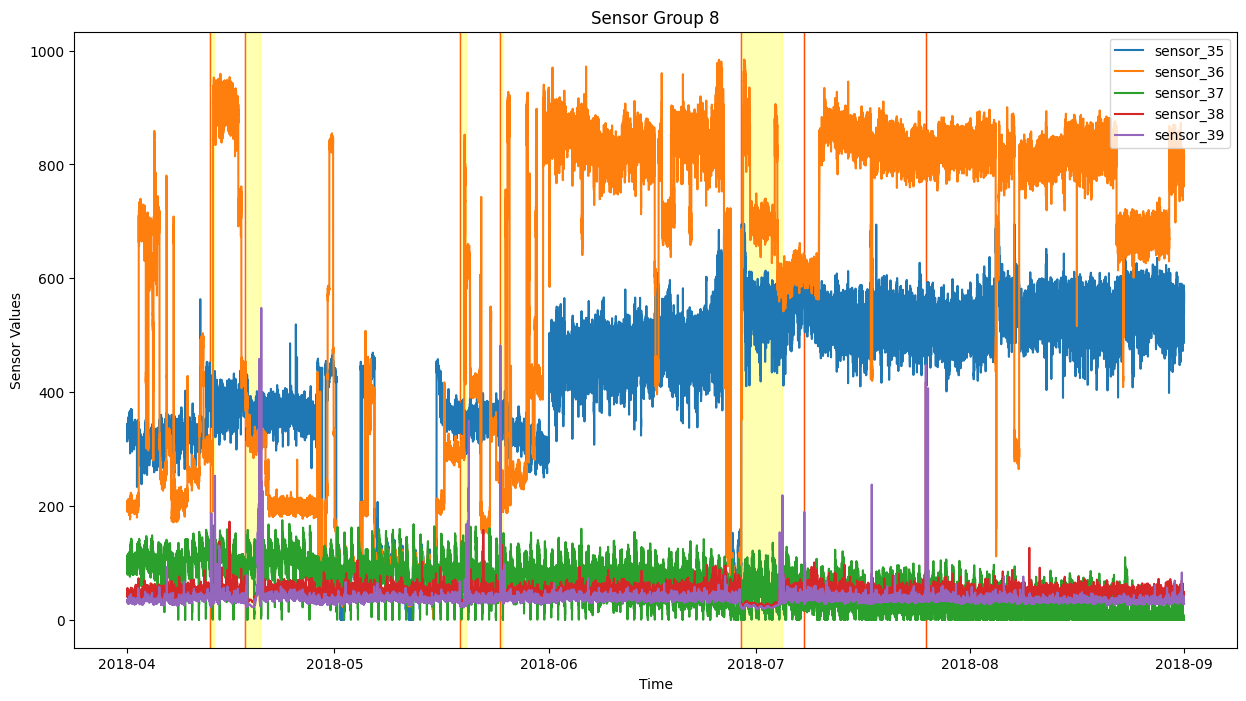

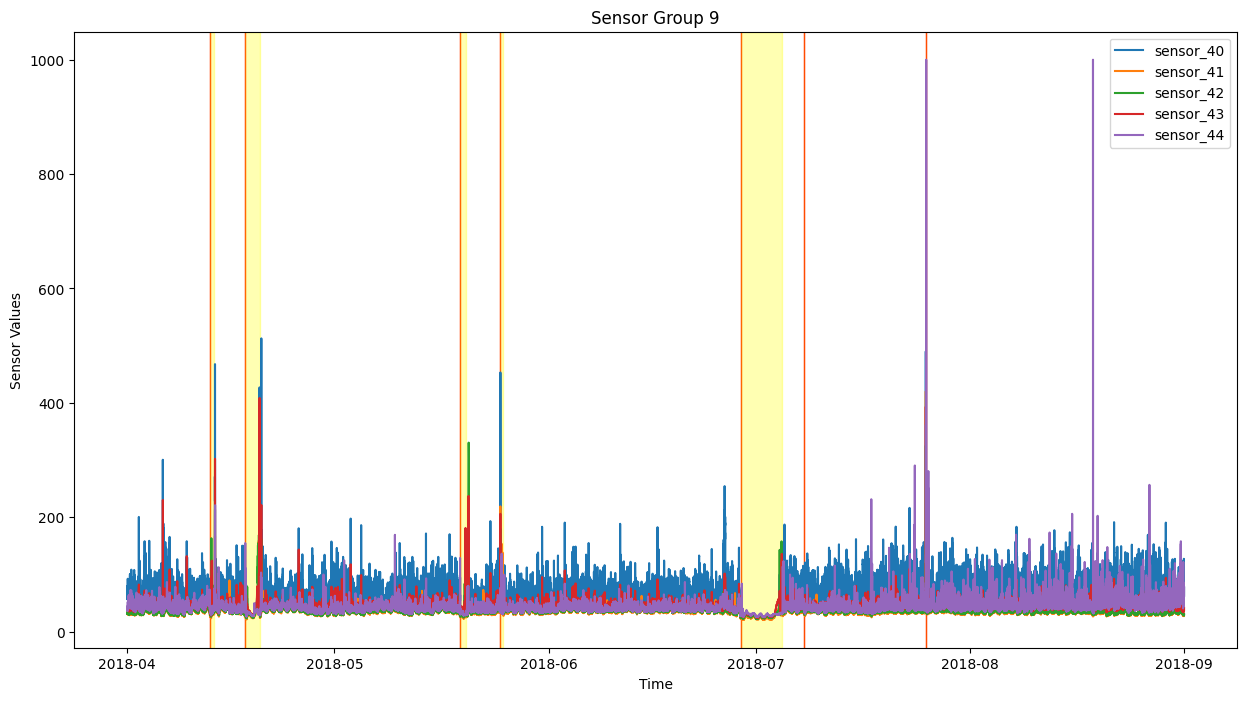

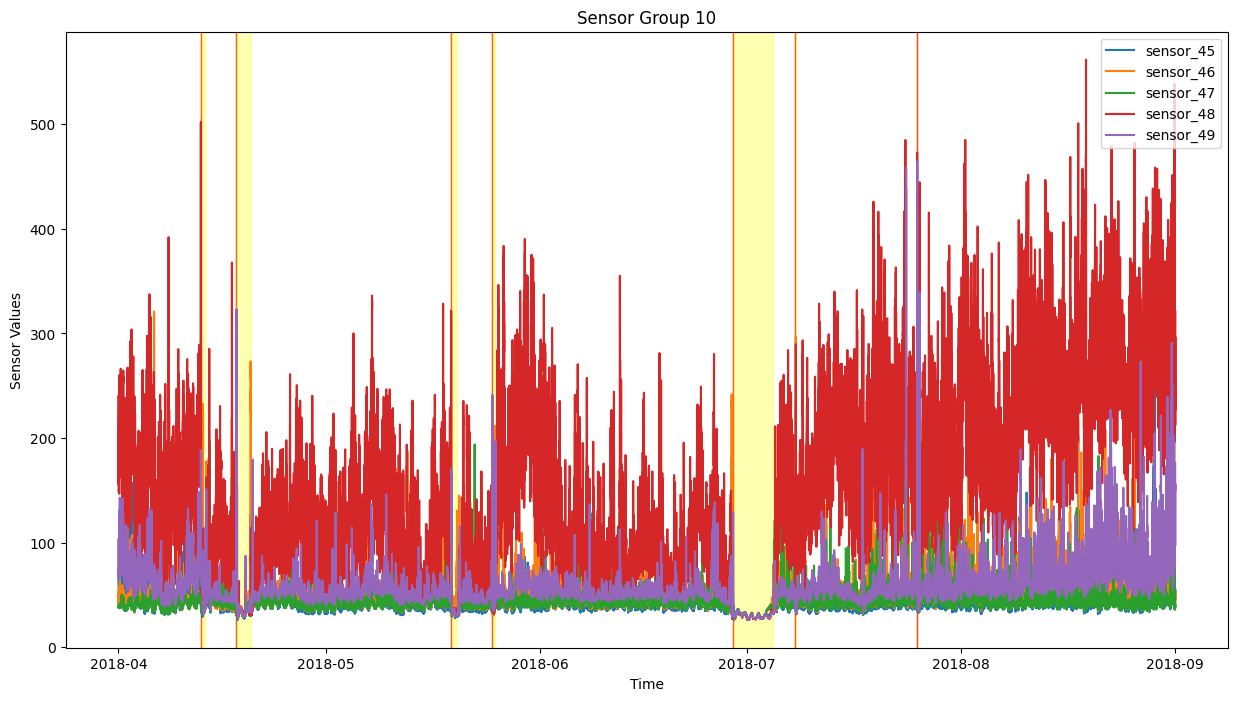

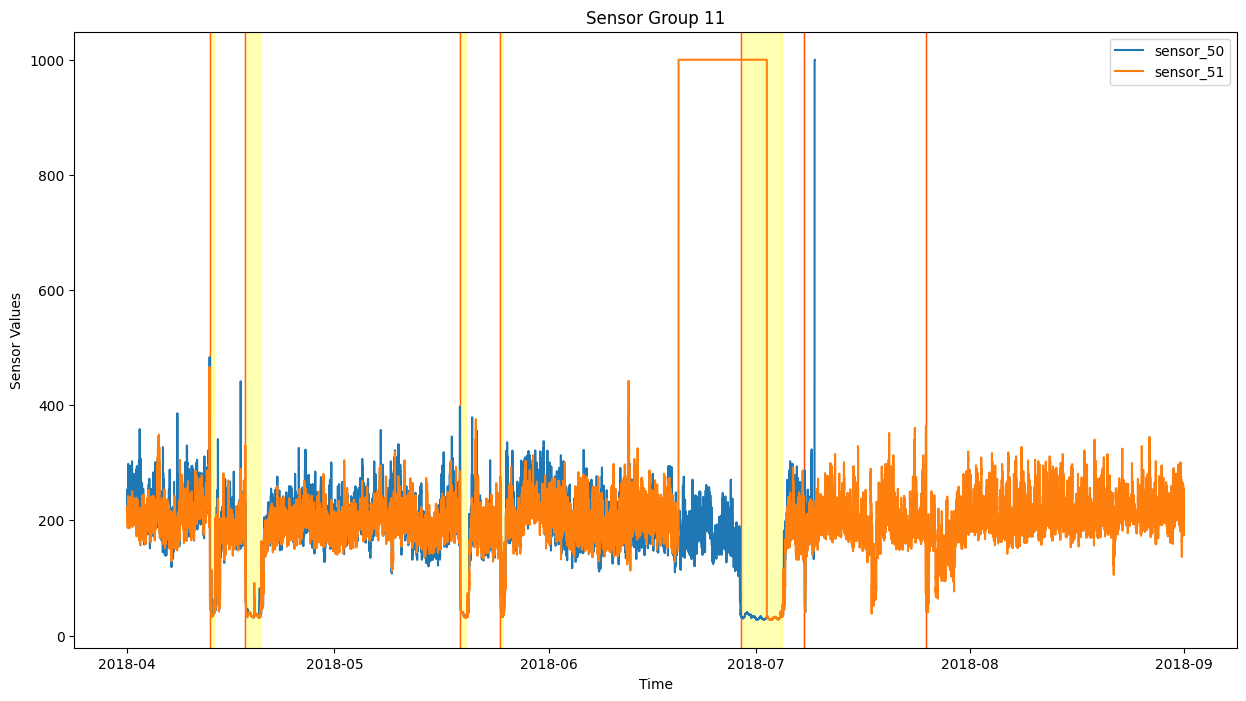

In [10]:
# Identify sensor columns
sensor_columns = [col for col in df.columns if col.startswith("sensor_")]

# Define the number of sensors per group
sensors_per_group = 5

# Group the sensors
sensor_groups = [
    sensor_columns[i : i + sensors_per_group]
    for i in range(0, len(sensor_columns), sensors_per_group)
]


# Function to get status periods
def get_status_periods(df, status_value):
    periods = []
    status_series = df["machine_status"] == status_value
    start = None
    for idx in range(len(status_series)):
        if status_series.iloc[idx] and start is None:
            start = df["timestamp"].iloc[idx]
        elif not status_series.iloc[idx] and start is not None:
            end = df["timestamp"].iloc[idx]
            periods.append((start, end))
            start = None
    if start is not None:
        periods.append((start, df["timestamp"].iloc[-1]))
    return periods


# Get periods for 'Broken' and 'recovering' statuses
broken_periods = get_status_periods(df, "BROKEN")
recovering_periods = get_status_periods(df, "RECOVERING")

# Iterate over each group of sensors
for group_index, sensor_group in enumerate(sensor_groups):
    plt.figure(figsize=(15, 8))

    # Plot each sensor in the group
    for sensor in sensor_group:
        sns.lineplot(data=df, x="timestamp", y=sensor, label=sensor)

    # Add shaded regions for 'Broken' status
    for start, end in broken_periods:
        plt.axvspan(start, end, color="red", alpha=1)

    # Add shaded regions for 'recovering' status
    for start, end in recovering_periods:
        plt.axvspan(start, end, color="yellow", alpha=0.3)

    # Customize the plot
    plt.xlabel("Time")
    plt.ylabel("Sensor Values")
    plt.title(f"Sensor Group {group_index + 1}")
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
# Identify where the machine status changes
df["status_change"] = df["machine_status"].ne(df["machine_status"].shift())

# Assign a unique ID to each continuous period of the same status
df["period_id"] = df["status_change"].cumsum()

# Group the data by 'period_id' to get start and end times of each period
periods = (
    df.groupby("period_id")
    .agg(
        start_time=("timestamp", "first"),
        end_time=("timestamp", "last"),
        status=("machine_status", "first"),
    )
    .reset_index(drop=True)
)

# Initialize a list to hold the results
results = []

# Iterate over the periods DataFrame
for idx, row in periods.iterrows():
    if row["status"] == "BROKEN":
        malfunction = {}

        # First, get the 'Normal' period before the 'Broken' period
        if idx > 0 and periods.loc[idx - 1, "status"] == "NORMAL":
            normal_period = periods.loc[idx - 1]
            malfunction["Normal_Start"] = normal_period["start_time"]
            malfunction["Normal_End"] = normal_period["end_time"]
            malfunction["Normal_Duration"] = (
                normal_period["end_time"] - normal_period["start_time"]
            )
        else:
            malfunction["Normal_Start"] = np.nan
            malfunction["Normal_End"] = np.nan
            malfunction["Normal_Duration"] = pd.Timedelta(0)

        # Then, get the 'Broken' period
        malfunction["Broken_Start"] = row["start_time"]
        malfunction["Broken_End"] = row["end_time"]
        malfunction["Broken_Duration"] = row["end_time"] - row["start_time"]

        # Then, get the 'recovering' period after the 'Broken' period
        if idx < len(periods) - 1 and periods.loc[idx + 1, "status"] == "RECOVERING":
            recovering_period = periods.loc[idx + 1]
            malfunction["Recovering_Start"] = recovering_period["start_time"]
            malfunction["Recovering_End"] = recovering_period["end_time"]
            malfunction["Recovering_Duration"] = (
                recovering_period["end_time"] - recovering_period["start_time"]
            )
        else:
            malfunction["Recovering_Start"] = np.nan
            malfunction["Recovering_End"] = np.nan
            malfunction["Recovering_Duration"] = pd.Timedelta(0)

        # Append the malfunction info to results
        results.append(malfunction)

# Create a DataFrame from the results
malfunction_df = pd.DataFrame(results)

# Rearrange the columns to put 'Normal' data first, then 'Broken', then 'Recovering'
malfunction_df = malfunction_df[
    [
        "Normal_Start",
        "Normal_End",
        "Normal_Duration",
        "Broken_Start",
        "Broken_End",
        "Broken_Duration",
        "Recovering_Start",
        "Recovering_End",
        "Recovering_Duration",
    ]
]

# Display the results
malfunction_df

,Normal_Start,Normal_End,Normal_Duration,Broken_Start,Broken_End,Broken_Duration,Recovering_Start,Recovering_End,Recovering_Duration
0,2018-04-01 00:00:00,2018-04-12 21:54:00,11 days 21:54:00,2018-04-12 21:55:00,2018-04-12 21:55:00,0 days,2018-04-12 21:56:00,2018-04-13 13:39:00,0 days 15:43:00
1,2018-04-13 13:40:00,2018-04-18 00:29:00,4 days 10:49:00,2018-04-18 00:30:00,2018-04-18 00:30:00,0 days,2018-04-18 00:31:00,2018-04-20 04:20:00,2 days 03:49:00
2,2018-04-20 04:21:00,2018-05-19 03:17:00,28 days 22:56:00,2018-05-19 03:18:00,2018-05-19 03:18:00,0 days,2018-05-19 03:19:00,2018-05-20 01:10:00,0 days 21:51:00
3,2018-05-20 01:11:00,2018-05-25 00:29:00,4 days 23:18:00,2018-05-25 00:30:00,2018-05-25 00:30:00,0 days,2018-05-25 00:31:00,2018-05-25 10:35:00,0 days 10:04:00
4,2018-05-25 10:36:00,2018-06-28 21:59:00,34 days 11:23:00,2018-06-28 22:00:00,2018-06-28 22:00:00,0 days,2018-06-28 22:01:00,2018-07-04 17:50:00,5 days 19:49:00
5,2018-07-04 17:51:00,2018-07-08 00:10:00,3 days 06:19:00,2018-07-08 00:11:00,2018-07-08 00:11:00,0 days,2018-07-08 00:12:00,2018-07-08 00:52:00,0 days 00:40:00
6,2018-07-08 00:53:00,2018-07-25 13:59:00,17 days 13:06:00,2018-07-25 14:00:00,2018-07-25 14:00:00,0 days,2018-07-25 14:01:00,2018-07-25 15:15:00,0 days 01:14:00


In [ ]:
# Melt the DataFrame to long format for plotting
melted_df = pd.melt(
    malfunction_df.reset_index(),
    id_vars=["index"],
    value_vars=[
        "Normal_Start",
        "Normal_End",
        "Broken_Start",
        "Broken_End",
        "Recovering_Start",
        "Recovering_End",
    ],
    var_name="Period",
    value_name="Timestamp",
)

# Add 'Start' and 'End' columns based on the period
melted_df["Start/End"] = melted_df["Period"].str.split("_").str[-1]
melted_df["Period"] = melted_df["Period"].str.split("_").str[0]

# Pivot back to wide format to get separate Start and End columns
final_df = melted_df.pivot(
    index=["index", "Period"], columns="Start/End", values="Timestamp"
).reset_index()
final_df["Start"] = pd.to_datetime(final_df["Start"])
final_df["End"] = pd.to_datetime(final_df["End"])

# Calculate duration for each period
final_df["Duration"] = (
    final_df["End"] - final_df["Start"]
).dt.total_seconds() / 3600  # Convert to hours

# Rename index to Malfunction for clarity
final_df.rename(columns={"index": "Malfunction"}, inplace=True)

# Add hover text with detailed labels
final_df["Label"] = final_df.apply(
    lambda row: f"{row['Period']} ({row['Duration']:.1f} hours)", axis=1
)

# Create a Gantt chart
fig = px.timeline(
    final_df,
    x_start="Start",
    x_end="End",
    y="Malfunction",
    color="Period",
    title="Machine Status Periods with Labels",
    labels={"Malfunction": "Malfunction ID"},
    text="Label",  # Add labels to the chart
)

# Improve layout
fig.update_traces(textposition="inside", insidetextanchor="middle")
fig.update_yaxes(type="category")  # Ensure the y-axis is treated as categorical

fig.show()

## Summary of Exploratory Data Analysis (EDA)

1. **Breakdowns**:
    - There are a total of 7 breakdowns recorded in the dataset.

2. **Handling Missing Values**:
    - The dataset contains several NaN values in the sensor columns. We can assume that these NaN values indicate no reading, so they can be replaced with 0.

3. **Sensor Values During Breakdowns and Recovery**:
    - Some sensors show low values during breakdown and recovery periods. However, there is no recognizable pattern that can be consistently observed across all breakdowns and recoveries.

4. **Data Span**:
    - The dataset spans 5 months, from April 2018 to August 2018.

5. **Target Variable Imbalance**:
    - The target variable, `machine_status`, is highly imbalanced. The majority of the data points are labeled as `NORMAL`, with very few instances of `BROKEN`.

6. **Data Splitting for Train and Test Sets**:
    - To ensure that the train and test sets contain instances of the `BROKEN` status, it is recommended to split the data on July 8, after the last recovery period is finished. This approach will help in creating a balanced representation of the target variable in both sets.